In [32]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [33]:
data=pd.read_csv('C:/Users/Rakesh/Datasets/Instagram.csv',encoding = 'latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920.0,2586.0,1028.0,619.0,56.0,98.0,9.0,5.0,162.0,35.0,2.0,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394.0,2727.0,1838.0,1174.0,78.0,194.0,7.0,14.0,224.0,48.0,10.0,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021.0,2085.0,1188.0,0.0,533.0,41.0,11.0,1.0,131.0,62.0,12.0,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528.0,2700.0,621.0,932.0,73.0,172.0,10.0,7.0,213.0,23.0,8.0,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518.0,1704.0,255.0,279.0,37.0,96.0,5.0,4.0,123.0,8.0,0.0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [34]:
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [35]:
data=data.dropna()

In [36]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

C:\Users\Rakesh\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



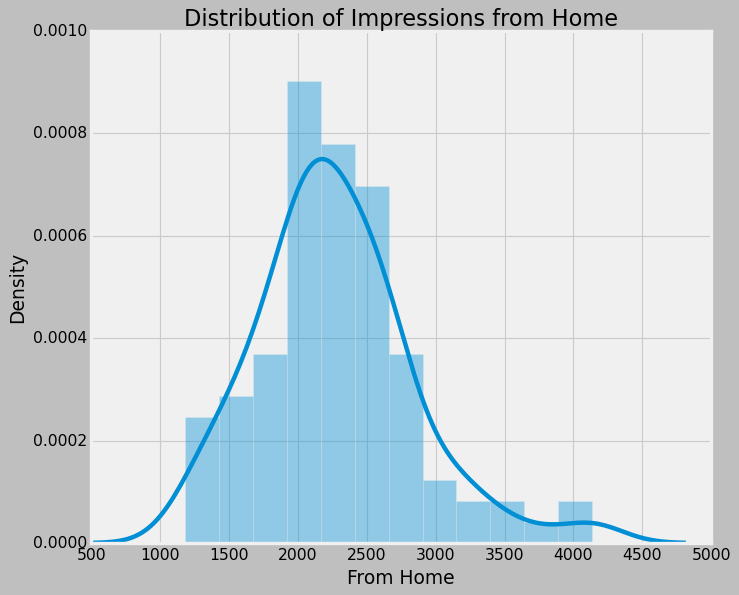

In [37]:
# Analyzing Instagram Reach
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title('Distribution of Impressions from Home')
sns.distplot(data['From Home'])
plt.show()

C:\Users\Rakesh\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



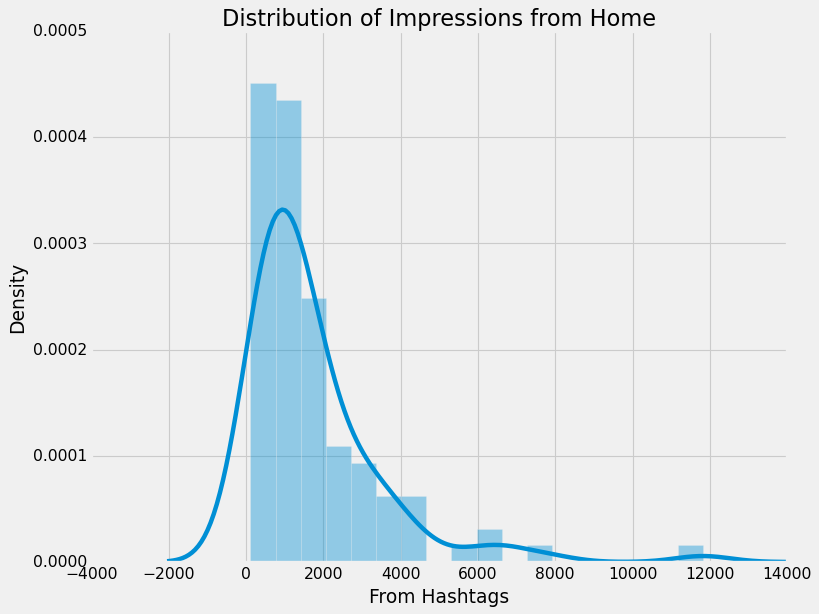

In [38]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Impressions from Home')
sns.distplot(data['From Hashtags'])
plt.show()

C:\Users\Rakesh\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



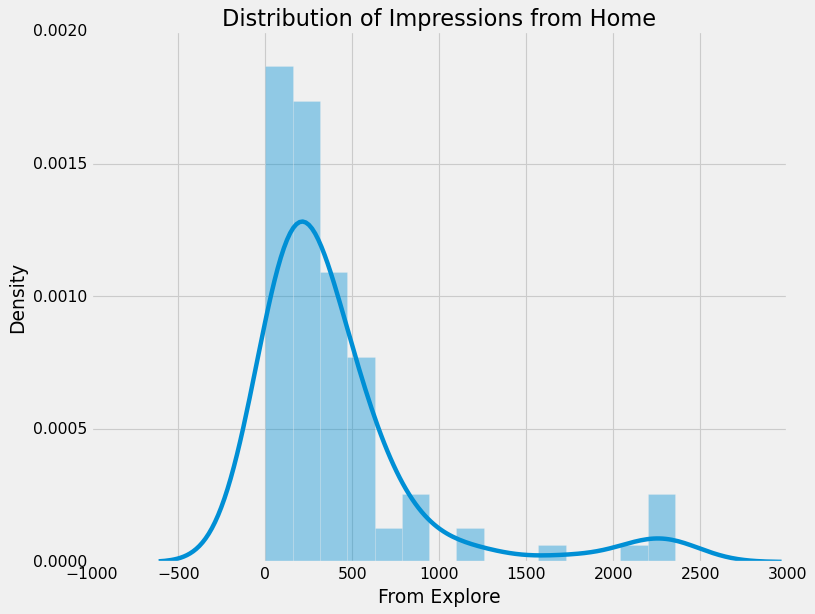

In [39]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Impressions from Home')
sns.distplot(data['From Explore'])
plt.show()

In [40]:
#Analyzing in Pie
home=data['From Home'].sum()
hashtags=data['From Hashtags'].sum()
explore=data['From Explore'].sum()
other=data['From Other'].sum()

labels=['From Home','From Hashtags','From Explore','From Other']
values=[home,hashtags,explore,other]

fig=px.pie(data,values=values, names=labels, title='Impression on Instagram posts from various sources', hole=0.5)
fig.show()

## Analyze the content of instagram posts

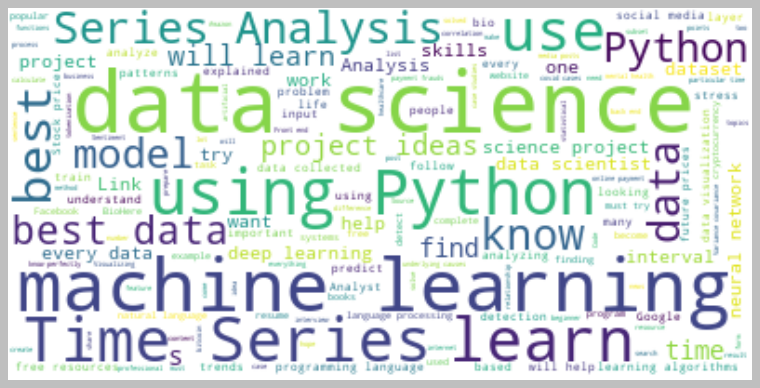

In [41]:
text="".join(i for i in data.Caption)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

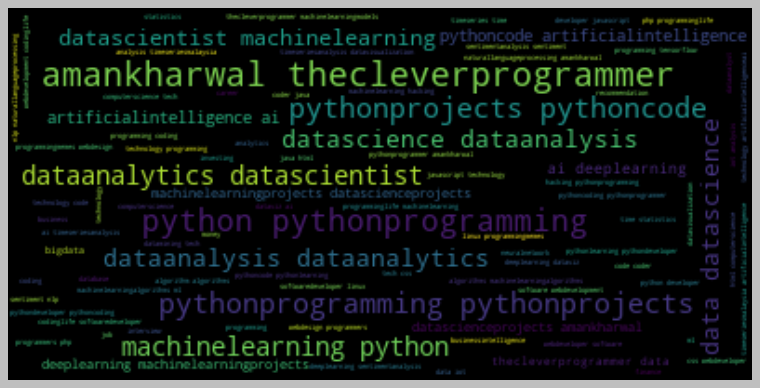

In [42]:
text="".join(i for i in data.Hashtags)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords, background_color='black').generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
#Analyzing Relationships
figure=px.scatter(data,x="Impressions",y="Likes",size="Likes",trendline="ols",title="Relationship between likes and impressions")
figure.show()

In [44]:
#Analyzing Relationships
figure=px.scatter(data,x="Impressions",y="Comments",size="Comments",trendline="ols",title="Relationship between comments and impressions")
figure.show()

In [45]:
#Analyzing Relationships
figure=px.scatter(data,x="Impressions",y="Shares",size="Shares",trendline="ols",title="Relationship between shares and impressions")
figure.show()

In [46]:
#Analyzing Relationships
figure=px.scatter(data,x="Impressions",y="Saves",size="Saves",trendline="ols",title="Relationship between Saves and impressions")
figure.show()

In [47]:
correlation=data.corr()

In [48]:
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


## Analyzing Conversion rate

In [49]:
conversion_rate=(data['Follows'].sum()/data["Profile Visits"].sum())*100
print(conversion_rate)

31.17770767613039


In [51]:
figure=px.scatter(data,x="Profile Visits",y="Follows",size="Follows",trendline="ols", title="Relationship between profile visits and followers gained")
figure.show()

## Instagram Reach Prediction Model

In [54]:
x=np.array(data[['Likes','Saves','Comments','Shares','Profile Visits', 'Follows']])

In [55]:
y=np.array(data[['Impressions']])

In [56]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
model=PassiveAggressiveRegressor()

In [59]:
model.fit(xtrain,ytrain)

C:\Users\Rakesh\Downloads\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



PassiveAggressiveRegressor()

In [60]:
model.score(xtest,ytest)

0.9348392307229111

In [61]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])

In [63]:
model.predict(features)

array([9324.00045226])